# Notebook C: Some of mnay other useful things
## This notebook is provided as a chance to introduce a couple of other python packages that you might find useful:
    - Geopandas for handling 
    - Geoviews and cartopy for plotting geographical data (part of the holoviz collection)
    - Faker for creating random ~fake data with certain characteristics 
    
    and also some use of Numpy and Pandas packages

In [323]:
%conda install descartes cartopy faker geopandas geoviews

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 4.7.11
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base conda




In [300]:
import faker as fk
import pandas as pd
import numpy as np

In [301]:
# regional specifics for creating fake data
fk.config.AVAILABLE_LOCALES

{'ar_AA',
 'ar_EG',
 'ar_JO',
 'ar_PS',
 'ar_SA',
 'bg_BG',
 'bs_BA',
 'cs_CZ',
 'de',
 'de_AT',
 'de_CH',
 'de_DE',
 'dk_DK',
 'el_CY',
 'el_GR',
 'en',
 'en_AU',
 'en_CA',
 'en_GB',
 'en_IE',
 'en_NZ',
 'en_TH',
 'en_US',
 'es',
 'es_CA',
 'es_ES',
 'es_MX',
 'et_EE',
 'fa_IR',
 'fi_FI',
 'fr_CH',
 'fr_FR',
 'he_IL',
 'hi_IN',
 'hr_HR',
 'hu_HU',
 'hy_AM',
 'id_ID',
 'it_IT',
 'ja_JP',
 'ka_GE',
 'ko_KR',
 'la',
 'lb_LU',
 'lt_LT',
 'lv_LV',
 'mt_MT',
 'ne_NP',
 'nl_BE',
 'nl_NL',
 'no_NO',
 'pl_PL',
 'pt_BR',
 'pt_PT',
 'ro_RO',
 'ru_RU',
 'sk_SK',
 'sl_SI',
 'sv_SE',
 'th_TH',
 'tr_TR',
 'tw_GH',
 'uk_UA',
 'zh_CN',
 'zh_TW'}

In [302]:
# let's create a fake data generator for right here in blighty

fake_demo =fk.Faker('en_GB')

In [420]:
# 
fake_demo.name()

'Ross Newton'

In [421]:
fake_demo.name_male()

'Peter Evans'

In [422]:
fake_demo.country()

'Belgium'

In [423]:
fake_demo.latlng()

(Decimal('44.330027'), Decimal('-34.276899'))

In [424]:
fake_demo.iso8601()

'2014-11-15T22:58:50'

In [425]:
def create_fake_row(num=1):
        out = [{"name":fake_demo.name(),
                "LatLong":fake_demo.latlng(),
                "Country":fake_demo.country(),  # will not match LatLong
                "email":fake_demo.email(),
                "date_time":fake_demo.iso8601(),
                "paragraph":fake_demo.paragraph(),
                "bs":fake_demo.bs(),
                "randomdata":np.random.randint(1,1000)} for x in range(num)]
        return out

In [426]:
df_fake = pd.DataFrame(create_fake_row(1000))

df_fake.head()

,name,LatLong,Country,email,date_time,paragraph,bs,randomdata
0,Marcus Morley-Goddard,"(-67.671776, -179.475999)",Norfolk Island,janicedavies@jones.info,1985-06-10T01:29:16,Numquam facere veniam sapiente reprehenderit e...,architect B2B convergence,469
1,Ian Brown,"(50.967378, 149.118675)",Sweden,carly31@hotmail.com,2018-09-03T17:38:45,Sapiente beatae quo qui. Id non eaque optio mo...,orchestrate bricks-and-clicks web services,277
2,Valerie Davis,"(16.203064, 32.181576)",French Guiana,jodiesingh@gmail.com,2004-04-17T03:15:06,Tempora perspiciatis quisquam nobis aspernatur...,scale customized eyeballs,872
3,Dr. Bradley Norman,"(24.741999, -117.298056)",Gambia,ashley48@gmail.com,1972-12-14T14:42:08,Autem voluptate quibusdam amet. Quidem volupta...,leverage dynamic e-services,567
4,Harriet Ward,"(-83.265274, 156.603095)",New Zealand,rosemary51@hotmail.com,1978-05-20T08:54:59,Voluptates non unde libero aliquid culpa.,synergize proactive e-commerce,341


***
Our fake DataFrame contains a name, country and coordinates (not related to each other), some random numbers, an e-mail address, timestamp, a paragraph of random text, and a 'bs'  (short for business, but then this is all 'bs')
***

In [427]:
#Split LatLong column up
df_fake =df_fake.join(pd.DataFrame(df_fake.LatLong.values.tolist(), columns=['Lat', 'Long']))

we can split columns into new columns to help useage later if needed

In [428]:
fake_density =df_fake.Country.value_counts()

fake_density

Tunisia                          9
Russian Federation               9
Korea                            9
Congo                            9
Seychelles                       9
                                ..
Cayman Islands                   1
Serbia                           1
Holy See (Vatican City State)    1
Mali                             1
Australia                        1
Name: Country, Length: 237, dtype: int64


## Next we are going to import some of the choices we have for exploring geographical data

In [429]:
import geopandas as gpd
import matplotlib
%matplotlib inline

In [430]:
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [431]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [432]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"(POLYGON ((180 -16.06713266364245, 180 -16.555..."
1,53950935,Africa,Tanzania,TZA,150600.0,POLYGON ((33.90371119710453 -0.950000000000000...
2,603253,Africa,W. Sahara,ESH,906.5,POLYGON ((-8.665589565454809 27.65642588959236...
3,35623680,North America,Canada,CAN,1674000.0,"(POLYGON ((-122.84 49.00000000000011, -122.974..."
4,326625791,North America,United States of America,USA,18560000.0,"(POLYGON ((-122.84 49.00000000000011, -120 49...."


In [433]:
fake_demo_mapped = world.join(fake_density, on='name',how='inner')

fake_demo_mapped.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country
0,920938,Oceania,Fiji,FJI,8374.0,"(POLYGON ((180 -16.06713266364245, 180 -16.555...",3
1,53950935,Africa,Tanzania,TZA,150600.0,POLYGON ((33.90371119710453 -0.950000000000000...,4
3,35623680,North America,Canada,CAN,1674000.0,"(POLYGON ((-122.84 49.00000000000011, -122.974...",7
4,326625791,North America,United States of America,USA,18560000.0,"(POLYGON ((-122.84 49.00000000000011, -120 49....",1
5,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997033076265 49.21498078062912,...",3


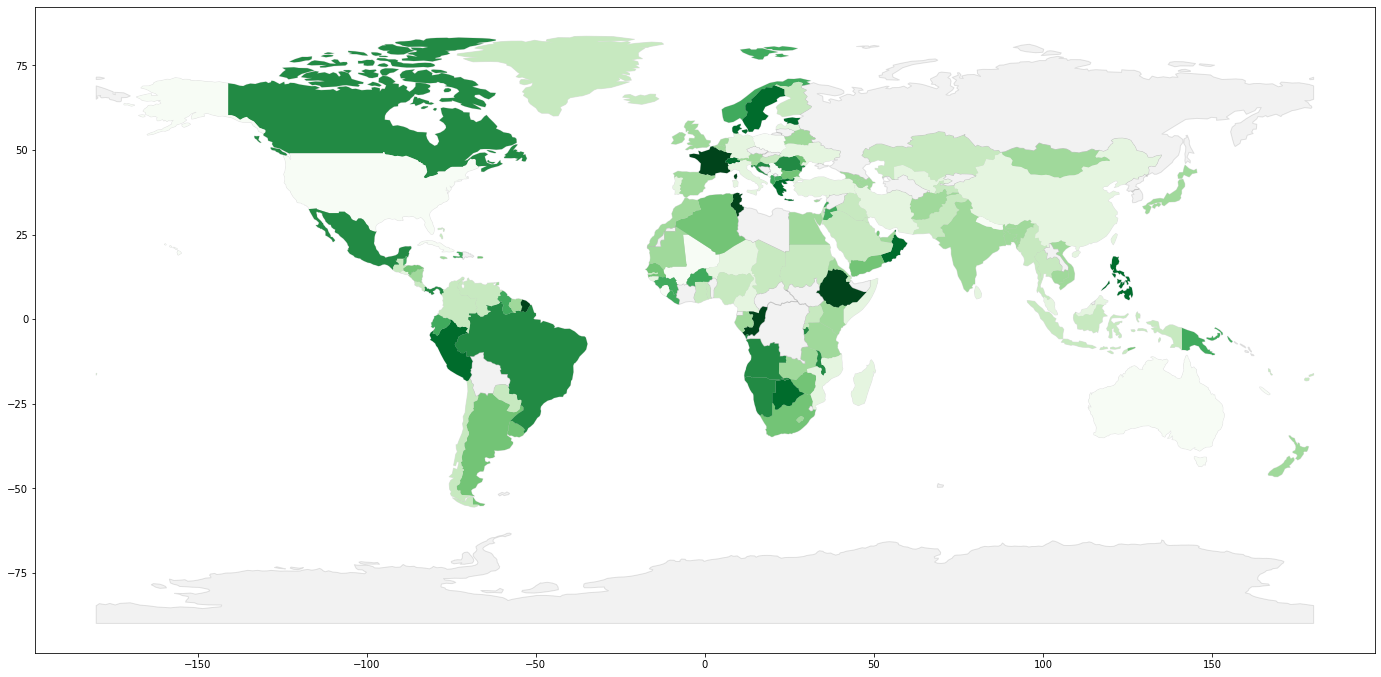

In [434]:
base = world.plot(alpha=0.1, color='gray', edgecolor='black', figsize=(24,24))
fake_demo_mapped.plot(column = 'Country',cmap='Greens', legend=False, ax=base)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
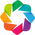

In [435]:
import cartopy.crs as crs
import geoviews as gv

gv.extension('bokeh')#, 'matplotlib')

In [436]:
#%conda list

In [437]:
choropleth =fake_demo_mapped.hvplot(geo=True, c=['Country','pop_est'])
choropleth

:Polygons   [Longitude,Latitude]   (pop_est,continent,name,iso_a3,gdp_md_est,Country)

In [438]:
(gv.tile_sources.CartoMidnight * choropleth).opts(width=800, height=700)#, global_extent=True)


:Overlay
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Polygons.I :Polygons   [Longitude,Latitude]   (pop_est,continent,name,iso_a3,gdp_md_est,Country)

In [439]:
import hvplot.pandas 

In [444]:
gv.tile_sources.Wikipedia*chloropleth*df_fake.hvplot.points(
    'Long', 'Lat', geo=True, color='randomdata',cmap='cubehelix', alpha=0.6, height=500, global_extent=True,
    projection=crs.GOOGLE_MERCATOR, tools=['hover'])

:Overlay
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Polygons.I :Polygons   [Longitude,Latitude]   (pop_est,continent,name,iso_a3,gdp_md_est,Country)
   .Points.I   :Points   [Long,Lat]   (randomdata)

### so fake Latitude and Longitudes might not be that useful as we have generated them so far.

In [447]:
#fake_demo.local_latlng()

('28.15112', '-82.46148', 'Lutz', 'US', 'America/New_York')

In [448]:
#fake_demo.location_on_land()

('43.91452', '-69.96533', 'Brunswick', 'US', 'America/New_York')

Questions: 

- 